<a href="https://colab.research.google.com/github/danifdezcaa/Trabajo-IA-II/blob/main/Primer_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo 1: Data wrangling and  EDA



En primer lugar se importa pandas y numpy.

La librería Pandas está dedicada a importar y a administar conjuntos de datos tabulares.

La librería Numpy está dedicada al cálculo numérico y al análisis de datos

In [ ]:
import pandas as pd
import numpy as np

A continuación se carga el dataset a utilizar en este primer trabajo, para ello se ha descargado un archivo csv desde Kaggle y se ha cargado a un repositorio de github para poder utilizarlo desde google colab.

In [ ]:
csv_url="https://raw.githubusercontent.com/danifdezcaa/Trabajo-IA-II/refs/heads/main/heart.csv"
data=pd.read_csv(csv_url) #Con este comando leemos el csv y lo almacenamos en 'data'


Comprobamos la correcta visualización de los datos.

In [ ]:
data.info() #Con el comando 'info()' podemos ver la información de los datos almacenados, en este caso dentro de la variable 'data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data #Para ver la tabla de datos completa

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Como se puede observar los datos están en una tabla de 918 filas y 12 columnas, esto se puede comprobar también con 'shape'

In [ ]:
data.shape

(918, 12)

A continuación, se describen las variables en el dataset

1. **Age**:  
   - **Definición**: Edad del paciente en años.  
   - **Importancia**: La edad es un factor clave en enfermedades cardiovasculares, ya que la probabilidad de problemas cardíacos suele aumentar con la edad.  

2. **Sex**:  
   - **Definición**: Sexo del paciente.  
   - **Categorías**:  
     - **M**: Masculino.  
     - **F**: Femenino.  
   - **Importancia**: Existen diferencias biológicas y de riesgo entre hombres y mujeres respecto a las enfermedades cardíacas.

3. **ChestPainType**:  
   - **Definición**: Tipo de dolor en el pecho que experimenta el paciente.  
   - **Categorías**:  
     - **TA**: Angina típica, generalmente asociada con enfermedad coronaria.  
     - **ATA**: Angina atípica, no necesariamente relacionada con problemas cardíacos.  
     - **NAP**: Dolor no anginoso, generalmente de origen no cardíaco.  
     - **ASY**: Asintomático, sin dolor en el pecho.  
   - **Importancia**: El tipo de dolor puede indicar la probabilidad de enfermedad cardíaca.

4. **RestingBP**:  
   - **Definición**: Presión arterial en reposo medida en mm Hg.  
   - **Importancia**: La presión arterial alta (hipertensión) es un factor de riesgo importante para enfermedades cardíacas.

5. **Cholesterol**:  
   - **Definición**: Colesterol sérico en mg/dl.  
   - **Importancia**: Niveles altos de colesterol están asociados con el riesgo de acumulación de placa en las arterias, lo que puede conducir a enfermedades cardíacas.

6. **FastingBS**:  
   - **Definición**: Nivel de azúcar en sangre en ayunas.  
   - **Categorías**:  
     - **1**: Si el nivel es mayor a 120 mg/dl.  
     - **0**: Si el nivel es menor o igual a 120 mg/dl.  
   - **Importancia**: La diabetes o la glucosa elevada son factores de riesgo cardiovascular.

7. **RestingECG**:  
   - **Definición**: Resultados del electrocardiograma en reposo.  
   - **Categorías**:  
     - **Normal**: Electrocardiograma normal.  
     - **ST**: Anormalidades en la onda ST-T (elevación, depresión o inversiones).  
     - **LVH**: Hipertrofia del ventrículo izquierdo según los criterios de Estes.  
   - **Importancia**: Las anormalidades en el ECG pueden indicar problemas cardíacos subyacentes.

8. **MaxHR**:  
   - **Definición**: Frecuencia cardíaca máxima alcanzada durante el ejercicio.  
   - **Importancia**: Un nivel reducido puede indicar una menor capacidad funcional o problemas cardíacos.

9. **ExerciseAngina**:  
   - **Definición**: Angina inducida por el ejercicio.  
   - **Categorías**:  
     - **Y**: Sí.  
     - **N**: No.  
   - **Importancia**: La presencia de angina durante el ejercicio suele asociarse con isquemia miocárdica.

10. **Oldpeak**:  
    - **Definición**: Valor numérico que representa la depresión del segmento ST respecto a la línea base del ECG.  
    - **Importancia**: La depresión del segmento ST puede ser un marcador de isquemia o daño al corazón.

11. **ST_Slope**:  
    - **Definición**: Pendiente del segmento ST durante el ejercicio.  
    - **Categorías**:  
      - **Up**: Ascendente.  
      - **Flat**: Plana.  
      - **Down**: Descendente.  
    - **Importancia**: La pendiente puede reflejar problemas en la irrigación del corazón, con una pendiente descendente siendo más preocupante.

12. **HeartDisease**:  
    - **Definición**: Clase de salida que indica si el paciente tiene enfermedad cardíaca.  
    - **Categorías**:  
      - **1**: Enfermedad cardíaca.  
      - **0**: Normal, sin enfermedad cardíaca.  
    - **Importancia**: Es el objetivo principal del dataset, utilizado para modelar o predecir la presencia de enfermedad cardíaca.  

In [ ]:
#Con 'dtypes' podemos ver el tipo de los datos
data.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


Se comprueban si hay datos vacíos

In [ ]:
data_null = pd.isnull(data) #con 'pd.isnull' generamos una matriz de True y False donde el True indica que hay un dato nulo (no hay dato). La matriz se almacena en data_null


In [ ]:
data_null.sum() # Al usar 'sum' sumamos cada elemento true=1 y false=0 de data_null y obtenemos el número de datos vacíos en cada columna

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Como vemos no hay datos nulos, por tanto no es necesario descartar filas con datos nulos.

En el caso de que hubiera sido necesario se haría con el siguiente código:

In [ ]:
data1 = data.dropna(axis = 0, how ='any')  #si axis =0 eliminamos la fila si es 1 eliminamos la columna
#how = 'all' elimina filas con todos sus datos nulos y 'any' con que solo haya un dato nulo


A continuación se va a aplicar la técnica **One-hot encoding**

**One-hot encoding** es una técnica utilizada para transformar datos categóricos en una representación numérica que los algoritmos de aprendizaje automático pueden procesar. Se usa principalmente cuando las variables categóricas no tienen un orden intrínseco, como colores, géneros o tipos de productos.

### ¿Cómo funciona?

Para una variable categórica con ( n ) categorías únicas, el one-hot encoding crea ( n ) columnas binarias (también llamadas *dummy variables*), donde cada columna representa una categoría específica. Si un dato pertenece a una categoría, el valor de la columna correspondiente es 1, y las demás columnas tendrán un valor de 0.

#### Ejemplo

Supongamos que tienes una variable categórica **"Color"** con las siguientes categorías:  
`["Rojo", "Azul", "Verde"]`

Y el dataset contiene estos datos:  
`["Rojo", "Azul", "Verde", "Rojo"]`

Con one-hot encoding, los datos se transformarían en:

| Rojo | Azul | Verde |
|------|------|-------|
| 1    | 0    | 0     |
| 0    | 1    | 0     |
| 0    | 0    | 1     |
| 1    | 0    | 0     |

### Ventajas

1. **Compatible con algoritmos de machine learning**: La mayoría de los algoritmos requieren datos numéricos para funcionar correctamente, y el one-hot encoding convierte las categorías en números sin imponer un orden arbitrario.
2. **Elimina ambigüedad**: No introduce relaciones artificiales entre las categorías, como ocurre al asignar valores numéricos directamente (por ejemplo, "Rojo" = 1, "Azul" = 2).

### Desventajas

1. **Incremento en dimensionalidad**: Si hay muchas categorías, el número de columnas en el dataset crece significativamente, lo que puede afectar el rendimiento y la eficiencia.
2. **Riesgo de sobreajuste**: Con muchas categorías, puede haber una relación artificial entre variables que afecta la capacidad del modelo para generalizar.

### Casos de uso

El one-hot encoding es útil cuando:

- Trabajas con variables categóricas nominales (sin un orden específico).
- Necesitas alimentar datos categóricos en modelos de machine learning que no manejan estas variables de forma nativa, como redes neuronales o modelos lineales.


Las variables en las que se va a aplicar esto son:

**Sex**

**chestPainType**

**RestingECG**

**ST_Slope**

In [ ]:
#Con este código, obtenemos los dummies de la variable Sex, habría que hacer lo
#mismo con cada variable y despues concatenar con data (A data se le debe de
#eliminar previamente las columnas originales)
dataSex = pd.get_dummies(data['Sex'], prefix='Sex') #Se obtienen los dummies de Sex
newdata = data.drop(['Sex'], axis=1)  #Se elimina la columna sex de 'data' y se almacena
                                      #en 'nawdata'
newdata = pd.concat([newdata,dataSex], axis=1) #Se concatenan


In [ ]:
#Una forma más rápida es usar el siguiente código:
data1 = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=False)
#Este código elimina directamente las columnas originales de 'data' y añade los dummies de todas las variables indicadas. Se almacena en 'data1'
data1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,N,0.0,0,False,True,False,True,False,False,False,True,False,False,False,True
1,49,160,180,0,156,N,1.0,1,True,False,False,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,N,0.0,0,False,True,False,True,False,False,False,False,True,False,False,True
3,48,138,214,0,108,Y,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False
4,54,150,195,0,122,N,0.0,0,False,True,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,N,1.2,1,False,True,False,False,False,True,False,True,False,False,True,False
914,68,144,193,1,141,N,3.4,1,False,True,True,False,False,False,False,True,False,False,True,False
915,57,130,131,0,115,Y,1.2,1,False,True,True,False,False,False,False,True,False,False,True,False
916,57,130,236,0,174,N,0.0,1,True,False,False,True,False,False,True,False,False,False,True,False


En el caso de **ExerciseAngina** los datos son Y y N, vamos a cambiar la Y por un 1 y la N por un 0.

**Y** = 1

**N** = 0

In [ ]:
#Primero almaceno una copia de 'data1' en 'data2'
data2 = data1.copy()
#ahora en 'data2', en la columna 'ExerciseAngina', se van a sustituir los valores 'Y' por 1 y los valores 'N' por 0
data2['ExerciseAngina'] = data2['ExerciseAngina'].replace({'Y': 1, 'N': 0})
data2

<ipython-input-13-a2e62698a16c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['ExerciseAngina'] = data2['ExerciseAngina'].replace({'Y': 1, 'N': 0})


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0.0,0,False,True,False,True,False,False,False,True,False,False,False,True
1,49,160,180,0,156,0,1.0,1,True,False,False,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0,0.0,0,False,True,False,True,False,False,False,False,True,False,False,True
3,48,138,214,0,108,1,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False
4,54,150,195,0,122,0,0.0,0,False,True,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,False,True,False,False,False,True,False,True,False,False,True,False
914,68,144,193,1,141,0,3.4,1,False,True,True,False,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1,1.2,1,False,True,True,False,False,False,False,True,False,False,True,False
916,57,130,236,0,174,0,0.0,1,True,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
# se deben de convertir las variables 'FastingBS', 'Exerciseangina' y 'HeartDisease' en booleanas en data2 y almacenar en data3
data3 = data2.copy()
data3['FastingBS'] = data3['FastingBS'].astype(bool)
data3['ExerciseAngina'] = data3['ExerciseAngina'].astype(bool)
data3['HeartDisease'] = data3['HeartDisease'].astype(bool)
data3

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,False,172,False,0.0,False,False,True,False,True,False,False,False,True,False,False,False,True
1,49,160,180,False,156,False,1.0,True,True,False,False,False,True,False,False,True,False,False,True,False
2,37,130,283,False,98,False,0.0,False,False,True,False,True,False,False,False,False,True,False,False,True
3,48,138,214,False,108,True,1.5,True,True,False,True,False,False,False,False,True,False,False,True,False
4,54,150,195,False,122,False,0.0,False,False,True,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,False,132,False,1.2,True,False,True,False,False,False,True,False,True,False,False,True,False
914,68,144,193,True,141,False,3.4,True,False,True,True,False,False,False,False,True,False,False,True,False
915,57,130,131,False,115,True,1.2,True,False,True,True,False,False,False,False,True,False,False,True,False
916,57,130,236,False,174,False,0.0,True,True,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
#Comprobamos visualizando el tipo de los datos en data3
data3.dtypes

,0
Age,int64
RestingBP,int64
Cholesterol,int64
FastingBS,bool
MaxHR,int64
ExerciseAngina,bool
Oldpeak,float64
HeartDisease,bool
Sex_F,bool
Sex_M,bool


## Visualización de datos con Pandas

Pandas tiene sus propios métodos de plotting.

In [ ]:
import matplotlib.pyplot as plt

Ahora vamos a usar un **Scatter Plot**

Un **scatter plot** (o diagrama de dispersión) es una representación gráfica que muestra la relación entre dos variables numéricas. Cada punto en el gráfico representa una observación o dato del conjunto de datos, con su posición determinada por los valores de esas dos variables.

### Componentes del Scatter Plot
1. **Ejes**:
   - El eje **x** representa una de las variables (independiente o predictor).
   - El eje **y** representa la otra variable (dependiente o respuesta).

2. **Puntos**:
   - Cada punto en el gráfico corresponde a una observación.
   - La posición del punto viene dada por los valores de las variables en los ejes.

### Propósito
Un scatter plot se utiliza para:
- **Visualizar relaciones**: Explorar si existe una relación o patrón entre dos variables (positiva, negativa o nula).
- **Detectar correlaciones**: Identificar qué tan relacionadas están las variables.
- **Identificar patrones**: Como tendencias lineales, no lineales, agrupaciones (clusters) o valores atípicos (outliers).


<Axes: xlabel='Age', ylabel='RestingBP'>

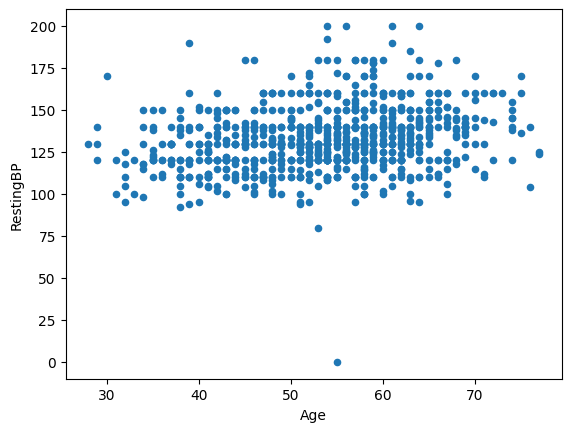

In [ ]:
#Por ejemplo se representa la relación entre la edad y la presión arterial
data.plot(kind="scatter", x="Age", y="RestingBP")

<Axes: xlabel='Age', ylabel='Cholesterol'>

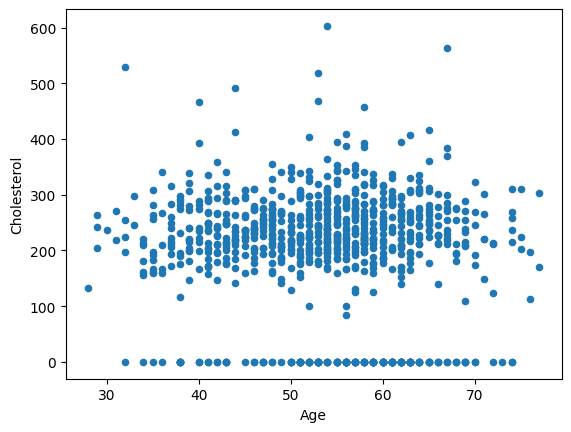

In [ ]:
#Por ejemplo se representa la relación entre la edad y el colesterol
data.plot(kind="scatter", x="Age", y="Cholesterol")

<Axes: xlabel='Cholesterol', ylabel='RestingBP'>

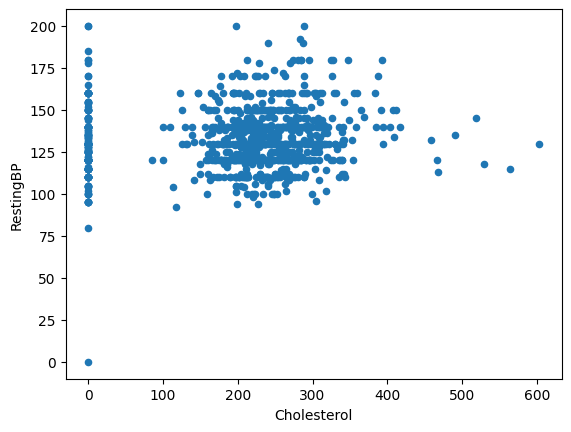

In [ ]:
#Por ejemplo se representa la relación entre Colesterol y la presión arterial
data.plot(kind="scatter", x="Cholesterol", y="RestingBP")

<Axes: xlabel='MaxHR', ylabel='Cholesterol'>

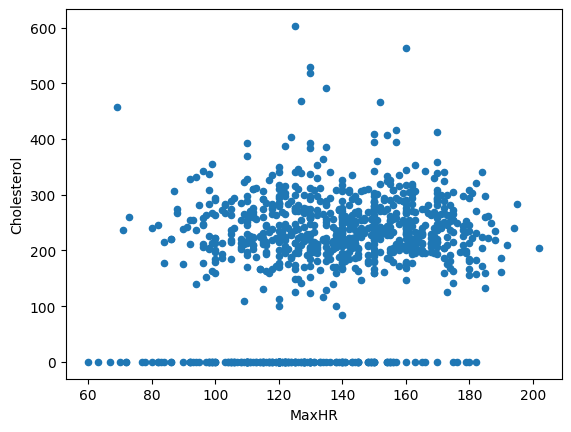

In [ ]:
#Por ejemplo se representa la relación entre la frecuencia cardíaca máxima alcanzada durante el ejercicio y colesterol
data.plot(kind="scatter", x="MaxHR", y="Cholesterol")

Ahora veamos la **correlación** entre algunas variables.

La **correlación** nos indicará en que medida están relacionadas dos variables.

Las variables a estudiar son:


**Age**: Edad del paciente en años.  
  
**RestingBP**: Presión arterial en reposo medida en mm Hg.  
   
**Cholesterol**: Colesterol sérico en mg/dl.  
   
**MaxHR**: Frecuencia cardíaca máxima alcanzada durante el ejercicio.  
  
**Oldpeak**: Valor numérico que representa la depresión del segmento ST respecto a la línea base del ECG.  



In [ ]:

# se extraen la variables numéricas
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Vemos la correlaión
correlations = data[numeric_features].corr()

In [ ]:
correlations

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


Ahora representamos mediantes **histogramas**

Un **histograma** es un tipo de gráfico que muestra la **distribución de frecuencias** de una variable numérica dividiendo los datos en intervalos (también llamados *bins* o *cubetas*). Es útil para visualizar cómo están distribuidos los valores de la variable, como su forma, dispersión y posibles tendencias.

### Componentes de un histograma
1. **Ejes**:
   - El eje **x** representa los intervalos (o rangos) en los que se agrupan los valores de la variable.
   - El eje **y** muestra la frecuencia o cantidad de datos que caen dentro de cada intervalo.

2. **Barras**:
   - Cada barra corresponde a un intervalo.
   - La altura de la barra indica la frecuencia (número de datos) en ese intervalo.

### Propósito
- **Visualizar la distribución de datos**: Ver si los datos tienen una distribución simétrica, sesgada, uniforme, etc.
- **Identificar características**: Detectar valores atípicos (*outliers*), modas (picos) y dispersión.
- **Comprender la forma de la distribución**: Por ejemplo, si es normal, bimodal o sesgada.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'Oldpeak'}>, <Axes: >]], dtype=object)

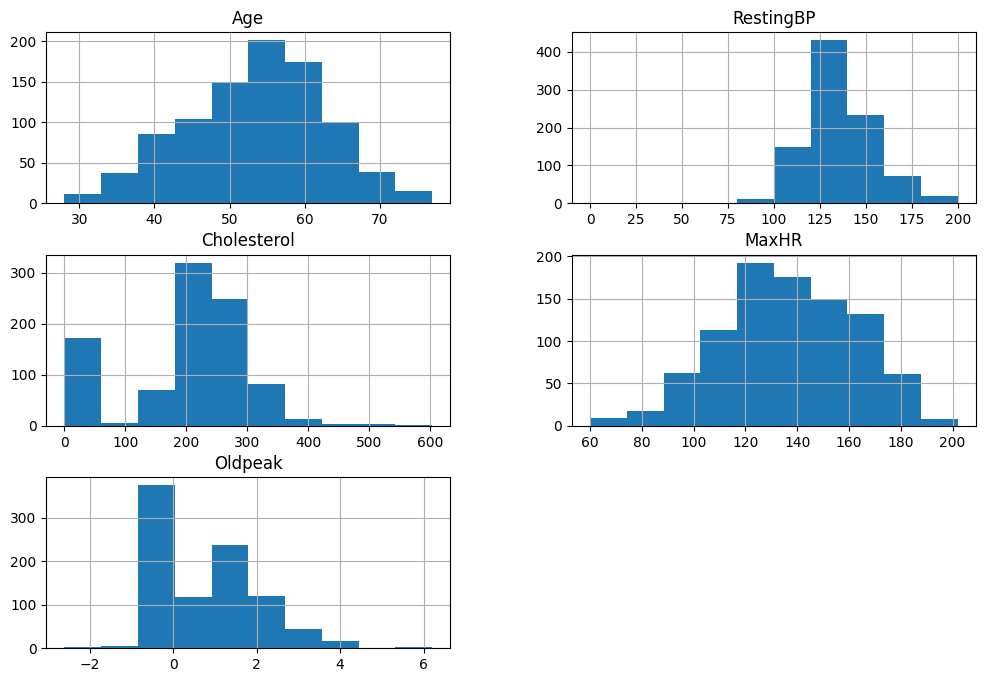

In [ ]:
# Se plotea el histograma de todas la variables numéricas almacenadas en 'numeric_features'
data[numeric_features].hist(figsize=(12,8))


<Axes: >

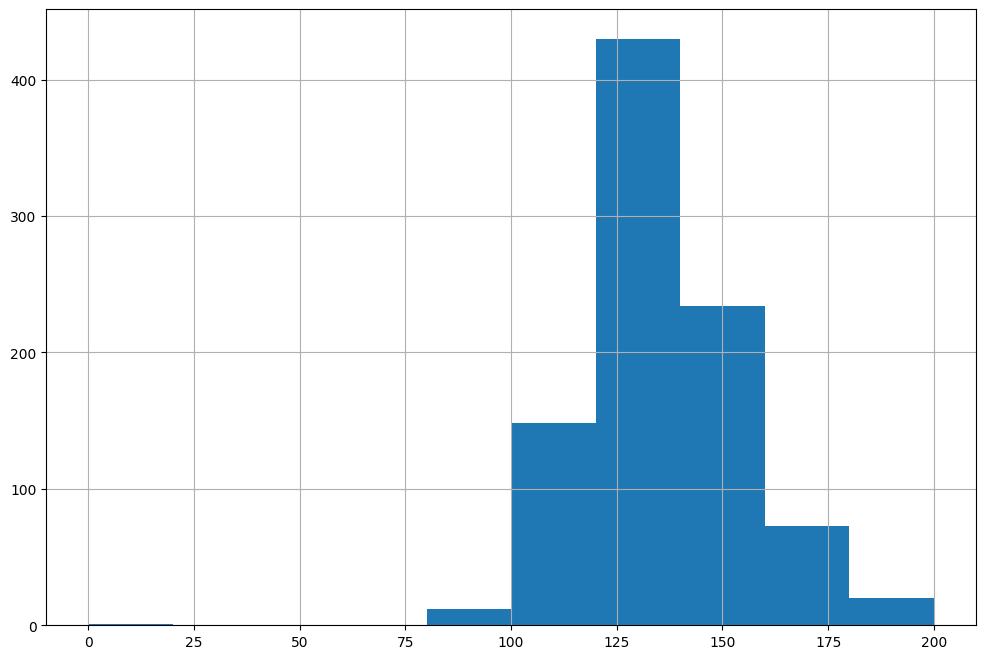

In [ ]:
#Si se quiere plotear una sola variable:
data['RestingBP'].hist(figsize=(12,8))

Ahora visualizamos con un **Boxplot Diagram**

Un **boxplot** (o diagrama de caja y bigotes) es una representación gráfica que resume la distribución de un conjunto de datos numéricos, destacando sus medidas principales y permitiendo identificar valores atípicos (*outliers*). Es especialmente útil para comparar distribuciones entre varios grupos.

### Componentes de un boxplot
1. **Caja (box)**:
   - Representa el rango intercuartílico (IQR, del inglés *Interquartile Range*), es decir, los datos entre el primer cuartil (Q1) y el tercer cuartil (Q3).
   - La **línea dentro de la caja** indica la mediana (Q2).

2. **Bigotes (whiskers)**:
   - Extienden la caja hacia los valores más pequeños y más grandes dentro de un rango aceptable (generalmente, 1.5 veces el IQR).

3. **Puntos fuera de los bigotes**:
   - Representan valores atípicos (*outliers*), es decir, datos que están fuera del rango aceptable.

4. **Ejes**:
   - El eje **x** suele representar categorías o grupos (si se comparan distribuciones).
   - El eje **y** representa los valores numéricos.

### Propósito
- **Resumir la distribución de datos**: Incluyendo mediana, dispersión y posibles sesgos.
- **Identificar valores atípicos**: Señalar datos extremos.
- **Comparar distribuciones**: Entre múltiples categorías o grupos.

<Axes: >

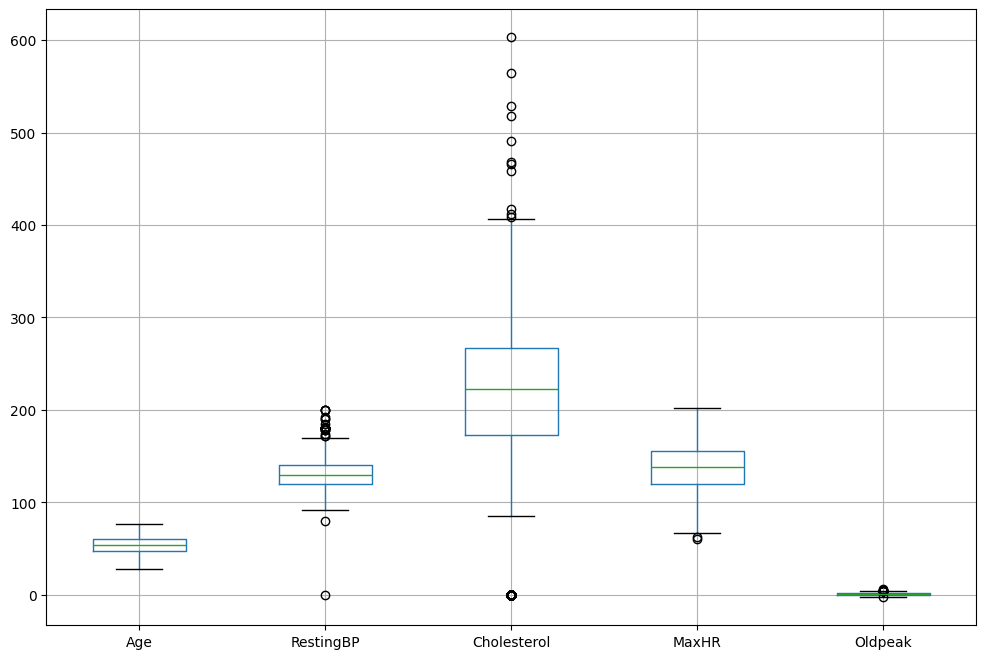

In [ ]:
data[numeric_features].boxplot(figsize=(12,8))

## Visualización de datos con **Seaborn**

**Seaborn** es una biblioteca de visualización de datos basada en **Matplotlib**, diseñada para facilitar la creación de gráficos estadísticos atractivos y personalizables. Ofrece herramientas de alto nivel que simplifican la visualización de relaciones y distribuciones, al tiempo que permite personalizar cada aspecto cuando sea necesario.

### Características principales de Seaborn
1. **Gráficos atractivos con menos código**:
   - Proporciona un diseño visual limpio y moderno por defecto.
   - Incluye estilos predefinidos para gráficos.

2. **Soporte para datos categóricos y estadísticos**:
   - Permite explorar relaciones entre variables categóricas y numéricas.
   - Ofrece gráficos como *boxplots*, *violin plots*, *swarm plots* y más.

3. **Integración con pandas**:
   - Trabaja perfectamente con estructuras de datos como **DataFrames**.
   - Admite variables categóricas y continuas directamente desde los nombres de las columnas.

4. **Mapeo automático de datos**:
   - Facilita el mapeo de datos a colores, tamaños y estilos mediante sus funciones.

5. **Alta personalización**:
   - Aunque permite generar gráficos rápidamente, también proporciona opciones para modificar cada detalle si es necesario.

In [ ]:
import seaborn as sns

<Axes: xlabel='HeartDisease', ylabel='count'>

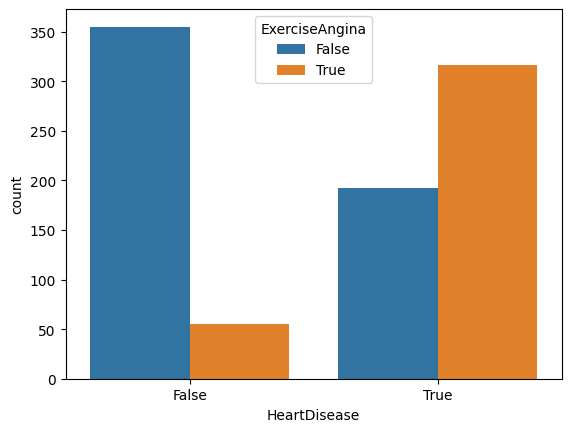

In [ ]:
#Se puede representar 'HertDisease' en un histograma con Seabons viendo que datos presentan 'ExerciseAngina'

sns.countplot(data=data3, x='HeartDisease', hue='ExerciseAngina')

Como se observa en la gráfica, hay una relación entre padecer un aenfermedad cardíaca y presentar un angina inducida por el ejercicio.

Vamos a comprobar la correlación con un mapa de calor

<Axes: >

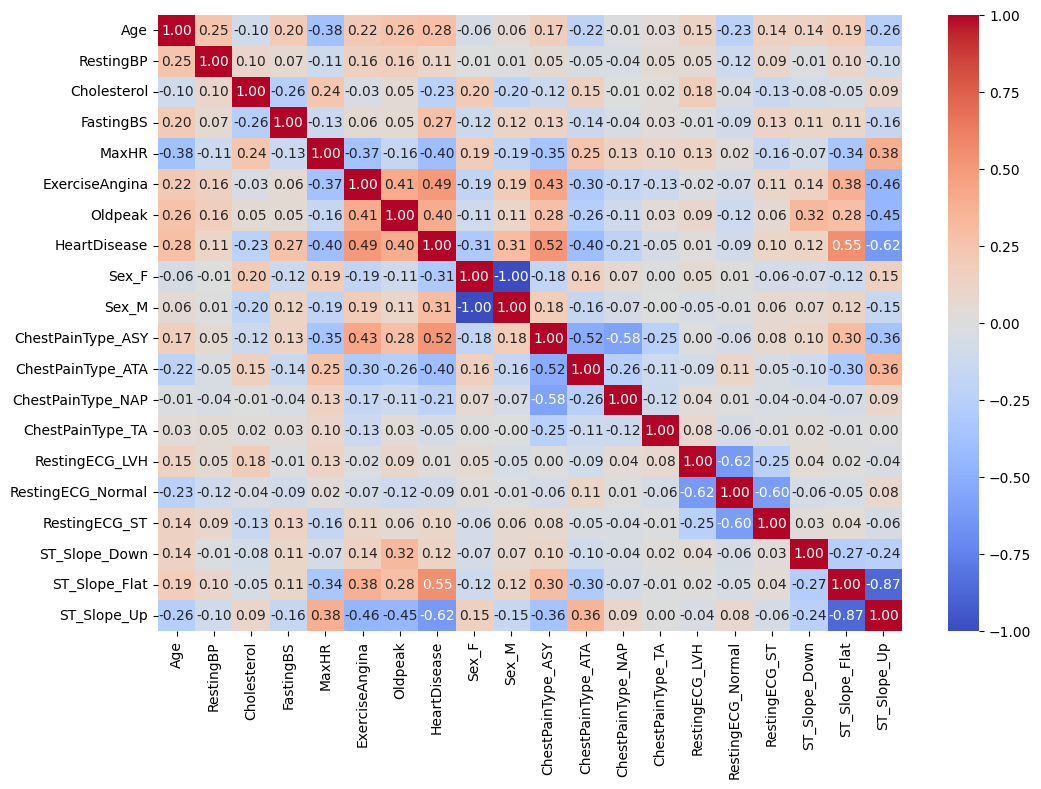

In [ ]:
#Ahora veamos la correlación entre las variables en 'data3' usando un mapa de calor en seabons
plt.figure(figsize=(12,8))
sns.heatmap(data3.corr(), annot=True, cmap='coolwarm', fmt=".2f")


Como se observa la correlación entre padecer una enfermedad cardíaca y presentar una angina inducida por el ejercicio es alta.

## Plots interactivos con **Ploty**

**Plotly** es una de las bibliotecas más avanzadas para crear y servir gráficos interactivos. Ofrece una amplia gama de herramientas para generar visualizaciones atractivas y dinámicas que se pueden integrar fácilmente en aplicaciones web o compartir en formato interactivo.

### Características principales de Plotly:
1. **Gráficos interactivos**:
   - Permite crear gráficos que el usuario puede explorar y manipular.
   - Ejemplos: gráficos de dispersión, barras, mapas, diagramas de caja, etc., con interactividad como zoom, hover y filtros.

2. **Integración con diferentes lenguajes**:
   - Se puede usar en Python, R, JavaScript, etc., permitiendo una amplia flexibilidad.
   - Python es el lenguaje más comúnmente utilizado.

3. **Creación de dashboards web**:
   - Permite la creación de dashboards interactivos completos y aplicaciones web.
   - Los gráficos no son solo estáticos, sino que responden a las acciones del usuario.

4. **Extensiones y personalización avanzada**:
   - Gran capacidad de personalización, como agregar estilos, etiquetas, herramientas de anotación, y temas.
   - Soporta múltiples formatos de datos (pandas, CSV, bases de datos).

5. **Desarrollo colaborativo**:
   - Ideal para proyectos colaborativos donde se comparten visualizaciones interactivas.


In [ ]:
import plotly.express as px

In [ ]:
#Se representan los valores de edad frente a los de colesterol, coloreando aquello datos que tengan enfermedad cardiaca
fig = px.scatter(data_frame=data3, x="Age", y="Cholesterol", color='HeartDisease' )
fig.show()

In [ ]:
#Se representan los valores de edad frente a los de colesterol, usanto esta vez un diagrama de cajas
fig = px.box(data_frame=data3, x="Age", y="Cholesterol" )
fig.show()

## Análisis de los datos

Se pueden extraer una serie de datos determinados de la tabla.

Se van a utilizar los datos almacenados en data3 y a partir de ahí vamos a obtener una serie de subdataset.

In [ ]:
#en primer lugar, a partir de 'data3', se van a extraer las columnas 'Sex_M', 'Sex_F', 'Age' y 'HeartDisease' y se van a almacenar en 'data3_subset'
data3_subset = data3[['Sex_M', 'Sex_F', 'Age', 'HeartDisease']]
data3_subset


,Sex_M,Sex_F,Age,HeartDisease
0,True,False,40,False
1,False,True,49,True
2,True,False,37,False
3,False,True,48,True
4,True,False,54,False
...,...,...,...,...
913,True,False,45,True
914,True,False,68,True
915,True,False,57,True
916,False,True,57,True


In [ ]:
#Ahora se extraen las filas de la 3 a la 10 de 'data3' y se almacenan en 'data3_subset2'
data3_subset2 = data3[3:10]
data3_subset2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
3,48,138,214,False,108,True,1.5,True,True,False,True,False,False,False,False,True,False,False,True,False
4,54,150,195,False,122,False,0.0,False,False,True,False,False,True,False,False,True,False,False,False,True
5,39,120,339,False,170,False,0.0,False,False,True,False,False,True,False,False,True,False,False,False,True
6,45,130,237,False,170,False,0.0,False,True,False,False,True,False,False,False,True,False,False,False,True
7,54,110,208,False,142,False,0.0,False,False,True,False,True,False,False,False,True,False,False,False,True
8,37,140,207,False,130,True,1.5,True,False,True,True,False,False,False,False,True,False,False,True,False
9,48,120,284,False,120,False,0.0,False,True,False,False,True,False,False,False,True,False,False,False,True


In [ ]:
#Ahora se extraen las filas de la 3 a la 10 de 'data3' y las columnas de la 10 a la 17 y se almacenan en 'data3_subset3'
data3_subset3 = data3.iloc[3:10, 10:17]
data3_subset3

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False
5,False,False,True,False,False,True,False
6,False,True,False,False,False,True,False
7,False,True,False,False,False,True,False
8,True,False,False,False,False,True,False
9,False,True,False,False,False,True,False


ahora vamos a crear una tabla con los primeros 10 pacientes donde se muestre que tipo de dolor en el pecho padecen en función de su edad y sexo.

**ChestPainType**: Tipo de dolor en el pecho que experimenta el paciente.

**Categorías**:

  TA: Angina típica, generalmente asociada con enfermedad coronaria.

  ATA: Angina atípica, no necesariamente relacionada con problemas cardíacos.

  NAP: Dolor no anginoso, generalmente de origen no cardíaco.
  
  ASY: Asintomático, sin dolor en el pecho.

In [ ]:
#Ahora se extraen las filas de la 0 a la 10 y las columnas de la 10 a la 14 de 'data3' y se concatenan a a las
#filas de la 0 a la 10 y las columnas 'Age', 'Sex_M' y 'Sex_F' también en 'data3'.
#La concatenación se almacena en 'data3_subset_chestpain'

data3_subset_chestpain = pd.concat([data3.loc[0:9,['Age', 'Sex_M', 'Sex_F']], data3.iloc[0:10, 10:14]], axis=1)
data3_subset_chestpain

,Age,Sex_M,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,True,False,False,True,False,False
1,49,False,True,False,False,True,False
2,37,True,False,False,True,False,False
3,48,False,True,True,False,False,False
4,54,True,False,False,False,True,False
5,39,True,False,False,False,True,False
6,45,False,True,False,True,False,False
7,54,True,False,False,True,False,False
8,37,True,False,True,False,False,False
9,48,False,True,False,True,False,False


##Filtrado de datos

A continuación , se van a realizar filtrados sobre 'data3'



In [ ]:
#En primer lugar, famos a filtar los pacientes que tienen mas 70 años en 'data3'
data3_filtered_age70 = data3[data3['Age'] > 70]
data3_filtered_age70


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
315,74,145,0,True,123,False,1.3,True,False,True,False,True,False,False,False,False,True,False,False,True
336,72,160,0,False,114,False,1.6,False,False,True,False,False,True,False,True,False,False,False,True,False
375,73,160,0,False,121,False,0.0,True,True,False,False,False,True,False,False,False,True,False,False,True
439,74,138,0,False,116,False,0.2,False,False,True,False,False,True,False,False,True,False,False,False,True
447,77,124,171,False,110,True,2.0,True,False,True,True,False,False,False,False,False,True,False,False,True
490,72,120,214,False,102,True,1.0,True,False,True,False,False,True,False,False,True,False,False,True,False
491,75,170,203,True,108,False,0.0,True,False,True,True,False,False,False,False,False,True,False,True,False
506,75,136,225,False,112,True,3.0,True,False,True,True,False,False,False,False,True,False,False,True,False
529,72,143,211,False,109,True,1.4,True,False,True,True,False,False,False,False,True,False,False,True,False
537,74,150,258,True,130,True,4.0,True,False,True,True,False,False,False,False,False,True,True,False,False


In [ ]:
#y contamos el numero de pacientes con dicha edad

N_pacientes_70 = data3_filtered_age70.shape[0]
print(f"Número de pacientes mayores de 70 años: {N_pacientes_70} pacientes")




Número de pacientes mayores de 70 años: 24 pacientes


In [ ]:
#También filtramos en 'data3' los pacientes con una edad inferior a 50 años
#que padezcan una enfermedad cardíaca (HeartDisease=True)
filter_data3 = (data3['Age'] < 50) & (data3['HeartDisease'] == True)
data3_filtered_70_HS = data3[filter_data3]
data3_filtered_70_HS

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
1,49,160,180,False,156,False,1.0,True,True,False,False,False,True,False,False,True,False,False,True,False
3,48,138,214,False,108,True,1.5,True,True,False,True,False,False,False,False,True,False,False,True,False
8,37,140,207,False,130,True,1.5,True,False,True,True,False,False,False,False,True,False,False,True,False
13,49,140,234,False,140,True,1.0,True,False,True,True,False,False,False,False,True,False,False,True,False
16,38,110,196,False,166,False,0.0,True,False,True,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,44,112,290,False,153,False,0.0,True,False,True,True,False,False,False,True,False,False,False,False,True
879,48,110,229,False,168,False,1.0,True,False,True,False,True,False,False,False,True,False,True,False,False
887,43,132,247,True,143,True,0.1,True,False,True,True,False,False,False,True,False,False,False,True,False
907,44,120,169,False,144,True,2.8,True,False,True,True,False,False,False,False,True,False,True,False,False


In [ ]:
#y contamos el numero de pacientes con dicha edad
N_pacientes_70_HS = data3_filtered_70_HS.shape[0]
print(f"Número de pacientes menores de 50 años con una enfermedad cardíaca: {N_pacientes_70_HS} pacientes")

Número de pacientes menores de 50 años con una enfermedad cardíaca: 111 pacientes


Existe una ecuación médica comúnmente utilizada para estimar la frecuencia cardíaca máxima en función de la edad:

  **Frecuencia Cardiaca Maxima Estimada = 220 − Age**

Aunque no siempre es precisa para todos los individuos, puede servir como referencia para interpretar la variable **MaxHR** y comparar su relación con la edad.

Entonces vamos a filtrar los datos por el valor de la frecuencia máxima estimada.

In [ ]:
#Se filtran los datos en 'data3' de forma que obtenemos los datos en los que '220 - Age' está entre 120 y 150 usando eval
data3_filtered_MaxHR_estimada = data3[data3.eval('220 - Age >= 120 and 220 - Age <= 150')]
data3_filtered_MaxHR_estimada

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
315,74,145,0,True,123,False,1.3,True,False,True,False,True,False,False,False,False,True,False,False,True
336,72,160,0,False,114,False,1.6,False,False,True,False,False,True,False,True,False,False,False,True,False
375,73,160,0,False,121,False,0.0,True,True,False,False,False,True,False,False,False,True,False,False,True
378,70,140,0,True,157,True,2.0,True,False,True,True,False,False,False,False,True,False,False,True,False
391,70,115,0,False,92,True,0.0,True,False,True,True,False,False,False,False,False,True,False,True,False
439,74,138,0,False,116,False,0.2,False,False,True,False,False,True,False,False,True,False,False,False,True
447,77,124,171,False,110,True,2.0,True,False,True,True,False,False,False,False,False,True,False,False,True
490,72,120,214,False,102,True,1.0,True,False,True,False,False,True,False,False,True,False,False,True,False
491,75,170,203,True,108,False,0.0,True,False,True,True,False,False,False,False,False,True,False,True,False
506,75,136,225,False,112,True,3.0,True,False,True,True,False,False,False,False,True,False,False,True,False


In [ ]:
#y contamos el numero de pacientes con dichos requisitos
N_pacientes_MaxHR_estimada = data3_filtered_MaxHR.shape[0]
print(f"Número de pacientes con una frecuencia cardíaca máxima estimada entre 120 y 150: {N_pacientes_MaxHR_estimada} pacientes")

Número de pacientes con una frecuencia cardíaca máxima estimada entre 120 y 150: 415 pacientes


In [ ]:
#Ahora quiero filtrar los pacientes con una edad entre 50 y 70 que tengan una enfermedad cardíaca ('HeartDisease=True')
#Primero filtramos los datos en 'data3'
filter_data3_50_70 = (data3['Age'] >= 50) & (data3['Age'] <= 70)
data3_filtered_50_70 = data3[filter_data3_50_70]

filter_data3_50_70_HD = (data3_filtered_50_70['HeartDisease'] == True)
data3_filtered_50_70_HD = data3_filtered_50_70[filter_data3_50_70_HD]
data3_filtered_50_70_HD




,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
11,58,136,164,False,99,True,2.0,True,False,True,False,True,False,False,False,False,True,False,True,False
18,60,100,248,False,125,False,1.0,True,False,True,True,False,False,False,False,True,False,False,True,False
30,53,145,518,False,130,False,0.0,True,False,True,False,False,True,False,False,True,False,False,True,False
32,54,125,224,False,122,False,2.0,True,False,True,True,False,False,False,False,True,False,False,True,False
36,65,140,306,True,87,True,1.5,True,False,True,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,59,164,176,True,90,False,1.0,True,False,True,True,False,False,False,True,False,False,False,True,False
912,57,140,241,False,123,True,0.2,True,True,False,True,False,False,False,False,True,False,False,True,False
914,68,144,193,True,141,False,3.4,True,False,True,True,False,False,False,False,True,False,False,True,False
915,57,130,131,False,115,True,1.2,True,False,True,True,False,False,False,False,True,False,False,True,False


In [ ]:
#y contamos el numero de pacientes con dichos requisitos
N_pacientes_50_70_HD = data3_filtered_50_70_HD.shape[0]
print(f"Número de pacientes con una edad entre 50 y 70 con una enfermedad cardíaca: {N_pacientes_50_70_HD} pacientes")


Número de pacientes con una edad entre 50 y 70 con una enfermedad cardíaca: 381 pacientes


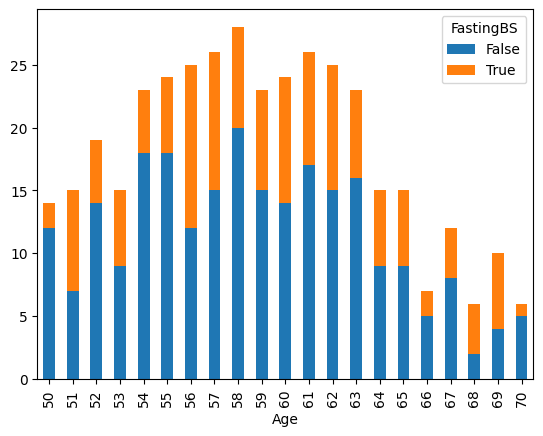

In [ ]:
#Ahora representamos en un histograma 'filter_data3_50_70_HD' mostrando la edad 'Age' y coloreando si el paciente presenta o no un nivel de azucar elevado (FastingBS)
import matplotlib.pyplot as plt
data3_filtered_50_70_HD.groupby(['Age','FastingBS']).size().unstack().plot(kind='bar',stacked=True)
plt.show()